In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
try:
    mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        password="Khan@123",
        database="EmployeeAnalytics"   
    )

    print(" MySQL Connected")

    query = "SELECT * FROM employee"  
    df = pd.read_sql(query, mydb)

except mysql.connector.Error as err:
    print(" Error:", err)


✅ MySQL Connected


C:\Users\patha\AppData\Local\Temp\ipykernel_14172\2420171751.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


In [6]:
print(df.head())
print(df.info())


   Employee_ID            Name  Age  Gender   Department  Job_Title  \
0            1    Merle Ingram   24  Female  Engineering   Engineer   
1            2      John Mayes   56    Male        Sales  Executive   
2            3    Carlos Wille   21    Male  Engineering     Intern   
3            4  Michael Bryant   30    Male      Finance    Analyst   
4            5   Paula Douglas   25  Female           HR    Analyst   

   Experience_Years Education_Level  Location  Salary  
0                 1          Master    Austin   90000  
1                33          Master   Seattle  195000  
2                 1        Bachelor  New York   35000  
3                 9        Bachelor  New York   75000  
4                 2          Master   Seattle   70000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null

In [7]:
df.columns = df.columns.str.lower()
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')


In [33]:
table = PrettyTable()
table.field_names = df.columns.tolist()

for _, row in df.iterrows():
    table.add_row(row.tolist())

print("\n EMPLOYEE DATA")
print(table)



 EMPLOYEE DATA
+-------------+------------------------+-----+--------+-------------+-----------+------------------+-----------------+---------------+--------+
| employee_id |          name          | age | gender |  department | job_title | experience_years | education_level |    location   | salary |
+-------------+------------------------+-----+--------+-------------+-----------+------------------+-----------------+---------------+--------+
|      1      |      Merle Ingram      |  24 | Female | Engineering |  Engineer |        1         |      Master     |     Austin    | 90000  |
|      2      |       John Mayes       |  56 |  Male  |    Sales    | Executive |        33        |      Master     |    Seattle    | 195000 |
|      3      |      Carlos Wille      |  21 |  Male  | Engineering |   Intern  |        1         |     Bachelor    |    New York   | 35000  |
|      4      |     Michael Bryant     |  30 |  Male  |   Finance   |  Analyst  |        9         |     Bachelor    |  

In [11]:
highest = df.loc[df['salary'].idxmax()]
print("\n Highest Salary Employee\n", highest)



 Highest Salary Employee
 employee_id                2133
name                Mark Newman
age                          59
gender                     Male
department              Finance
job_title             Executive
experience_years             36
education_level          Master
location               New York
salary                   215000
Name: 2132, dtype: object


In [13]:
second_highest = df.sort_values('salary', ascending=False).iloc[1]
print("\n Second Highest Salary\n", second_highest)



 Second Highest Salary
 employee_id                      9424
name                Alexander Compton
age                                59
gender                           Male
department                         HR
job_title                   Executive
experience_years                   36
education_level                Master
location                     New York
salary                         215000
Name: 9423, dtype: object


In [14]:
lowest = df.loc[df['salary'].idxmin()]
print("\n Lowest Salary Employee\n", lowest)



 Lowest Salary Employee
 employee_id                  1969
name                Jeanne Harden
age                            21
gender                     Female
department            Engineering
job_title                  Intern
experience_years                0
education_level          Bachelor
location                  Seattle
salary                      25000
Name: 1968, dtype: object


In [15]:
dept_avg = df.groupby('department')['salary'].mean()
print("\n Department Avg Salary\n", dept_avg)



 Department Avg Salary
 department
Engineering     90680.332739
Finance        130376.175549
HR             126400.602410
Marketing      101734.571600
Product        116676.334107
Sales          127309.766327
Name: salary, dtype: float64


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="deep")
plt.figure(figsize=(8,5))


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

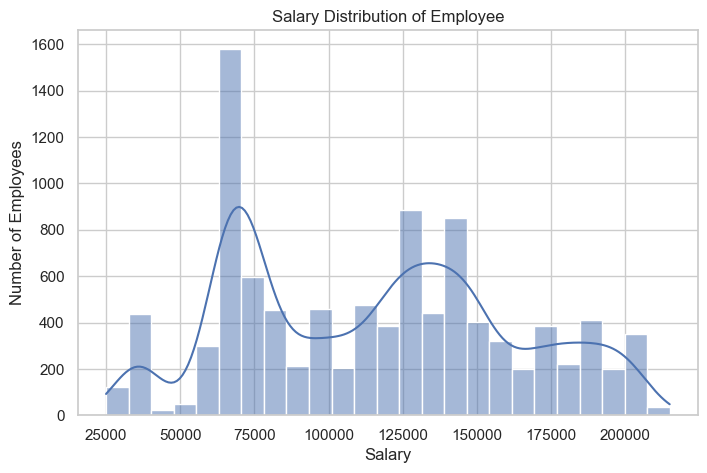

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['salary'], bins=25, kde=True)
plt.title("Salary Distribution of Employee")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.show()


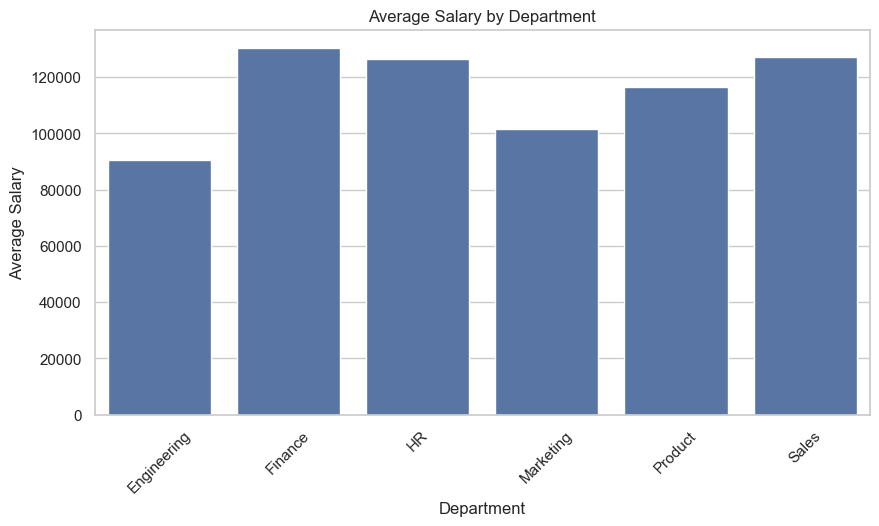

In [19]:
plt.figure(figsize=(10,5))
dept_avg = df.groupby('department')['salary'].mean().reset_index()

sns.barplot(data=dept_avg, x='department', y='salary')
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()


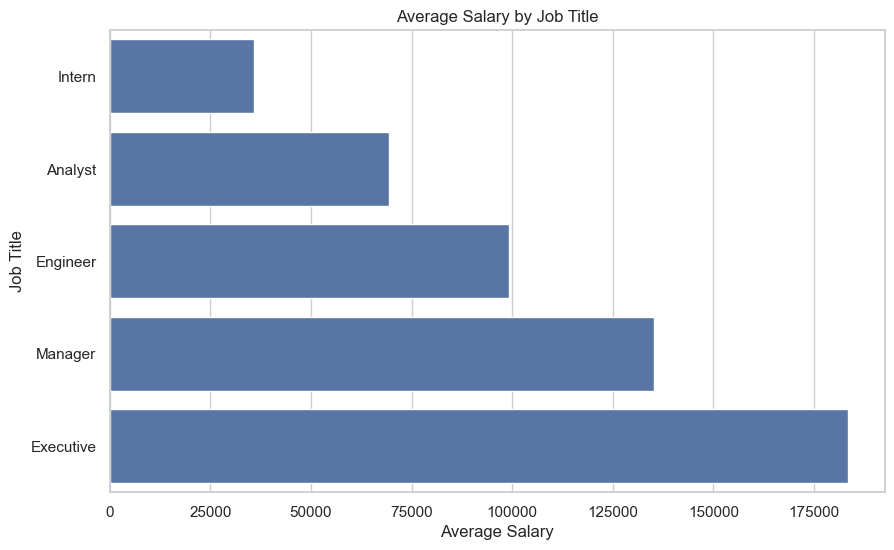

In [20]:
plt.figure(figsize=(10,6))
job_avg = df.groupby('job_title')['salary'].mean().sort_values().reset_index()

sns.barplot(data=job_avg, x='salary', y='job_title')
plt.title("Average Salary by Job Title")
plt.xlabel("Average Salary")
plt.ylabel("Job Title")
plt.show()


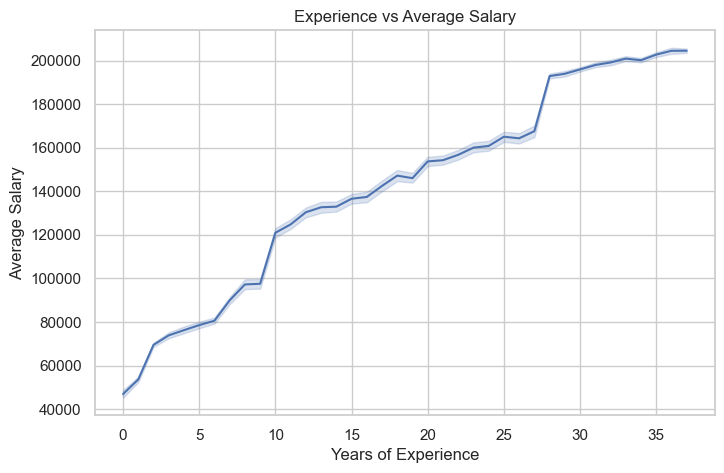

In [24]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='experience_years', y='salary', estimator='mean')
plt.title("Experience vs Average Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Average Salary")
plt.show()


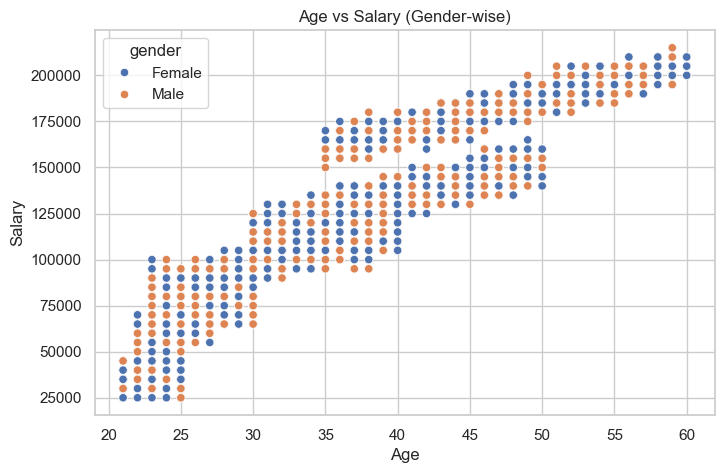

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='salary', hue='gender')
plt.title("Age vs Salary (Gender-wise)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()


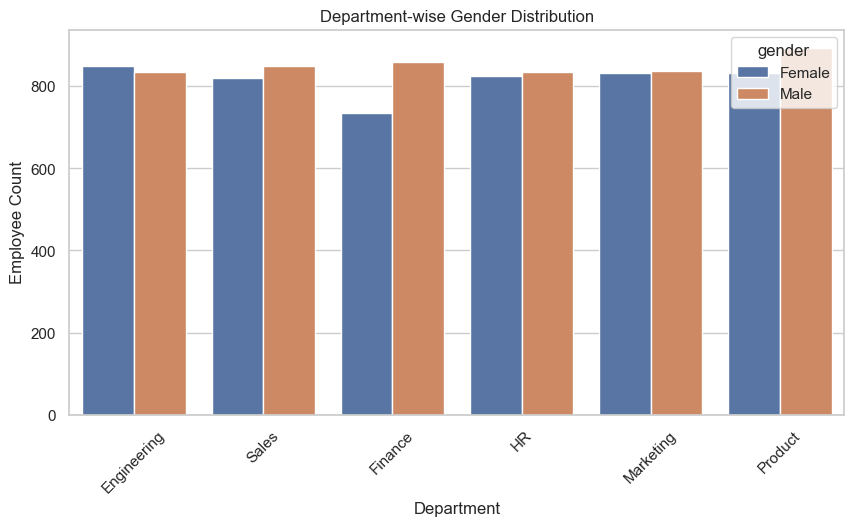

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='department', hue='gender')
plt.title("Department-wise Gender Distribution")
plt.xlabel("Department")
plt.ylabel("Employee Count")
plt.xticks(rotation=45)
plt.show()


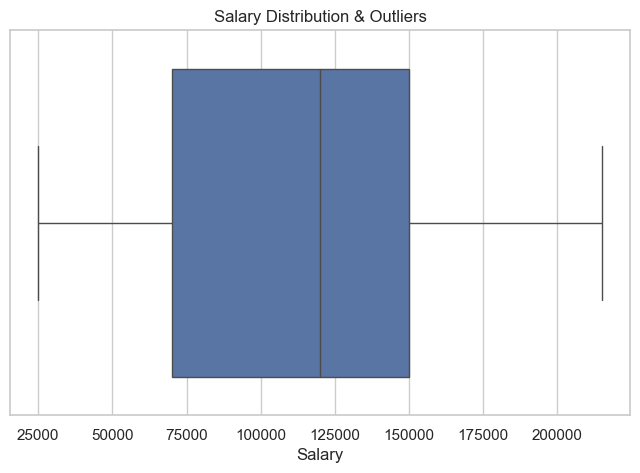

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='salary')
plt.title("Salary Distribution & Outliers")
plt.xlabel("Salary")
plt.show()
